# Black Friday Purchases


### Assignment 
The Management team wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. 

#### Data Description               
The company collected the transactional data of customers who purchased products from Stores during Black Friday. The dataset in sales_data.csv has the following features:

User_ID \
Product_ID \
Gender - sex of a customer \
Age - age in bins \
Occupation (masked) \
City_Category - category of the city [A, B, C] \
Stay_In_Current_City_Years: number of years a customer stays in their current city \
Marital_Status \
Product_Category (masked)  
Purchase - purchase amount 

Analyze the provided data and provide insights to the best of your abilities. 
Include the relevant tables/graphs/visualization to explain what you have learned about the market. 


In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [52]:
# Load the dataset
data = pd.read_csv("./datasets/sales_data.csv")

# DATA EXPLORATION

In [53]:
# Display the first 5 rows to get an overview of the data
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [54]:
# Display the last 5 rows to understand the end of the dataset
data.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [55]:
# Get the number of rows and columns in the dataset
data.shape

(550068, 10)

In [56]:
# Get the column names of the dataset
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

Checking datatypes and basic info

In [57]:
data.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

Statistical Summary of the data

In [58]:
# Get descriptive statistics for numerical and categorical data
data.describe(include = 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [59]:
#Compute the skewness of these numerical columns
data.select_dtypes(include=['int64']).skew()

User_ID             0.003066
Occupation          0.400140
Marital_Status      0.367437
Product_Category    1.025735
Purchase            0.600140
dtype: float64

- Skewness measures the asymmetry of the distribution of values in a column:

- Skewness = 0 → Perfectly symmetric distribution (like a normal bell curve).

- Skewness > 0 → Right-skewed (Positive skew) (More lower values, few high values).

- Skewness < 0 → Left-skewed (Negative skew) (More higher values, few low values).

**Insights about the skewness:**
- User_ID                       0.003066  → Nearly 0 (No skew, evenly distributed)
- Occupation                    0.400140  → Slightly right-skewed (More lower values)
- Stay_In_Current_City_Years    0.317236  → Slightly right-skewed (Most users stay for fewer years)
- Marital_Status                0.367437  → Slightly right-skewed (More unmarried users)
- Product_Category              1.025735  → **Highly right-skewed** (Most purchases are from a few categories)
- Purchase                      0.600140  → **Moderately right-skewed** (More lower-value purchases)

In [60]:
data.count()

User_ID                       550068
Product_ID                    550068
Gender                        550068
Age                           550068
Occupation                    550068
City_Category                 550068
Stay_In_Current_City_Years    550068
Marital_Status                550068
Product_Category              550068
Purchase                      550068
dtype: int64

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [62]:
# Checking Number of Unique Occupations that exist
print(data["Occupation"].nunique())

21


In [63]:
print(sorted(data["Occupation"].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


Understanding Unique Values in Each Column. To understand how varied the data is.

In [64]:
# Function to print unique values in each column
def print_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"\nUnique Values in column {column}: ", unique_values)

# Example usage
print_unique_values(data)


Unique Values in column User_ID:  [1000001 1000002 1000003 ... 1004113 1005391 1001529]

Unique Values in column Product_ID:  ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']

Unique Values in column Gender:  ['F' 'M']

Unique Values in column Age:  ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

Unique Values in column Occupation:  [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]

Unique Values in column City_Category:  ['A' 'C' 'B']

Unique Values in column Stay_In_Current_City_Years:  ['2' '4+' '3' '1' '0']

Unique Values in column Marital_Status:  [0 1]

Unique Values in column Product_Category:  [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]

Unique Values in column Purchase:  [ 8370 15200  1422 ...   135   123   613]


# DATA CLEANING

In [65]:
# Missing value detection
data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [66]:
# Checking duplicate values in the data set
data.duplicated(subset=None,keep='first').sum()

0

Removing "+" from the "Stay_In_Current_City_Years" column and converting it to "int" dtype

In [67]:
data.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [68]:
# Removing "+" symbol
data.Stay_In_Current_City_Years=data.Stay_In_Current_City_Years.str.replace("+","")

/var/folders/_h/68yv6pbs5wqc6xr4qd592nf80000gp/T/ipykernel_10964/2743546321.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.Stay_In_Current_City_Years=data.Stay_In_Current_City_Years.str.replace("+","")


In [69]:
data.Stay_In_Current_City_Years.unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [70]:
data['Stay_In_Current_City_Years'] = pd.to_numeric(data['Stay_In_Current_City_Years'])

In [71]:
data.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years     int64
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

### Insights:

- There are no null values

- There are 20 different occupations in the dataset

- Customers with age group of 26-35 have done more purchases (2,19,587) compared with others

- Customers in City_Category of B have done more purchases (2,31,173) compared with other City_Category

- Out of 5,50,000 data point. 4,14,259's gender is Male and rest are the Female.

- Customer with Minimum amount of Purchase is $12

- Customer with Maximum amount of Purchase is $23961

# DATA VISUALIZATION 

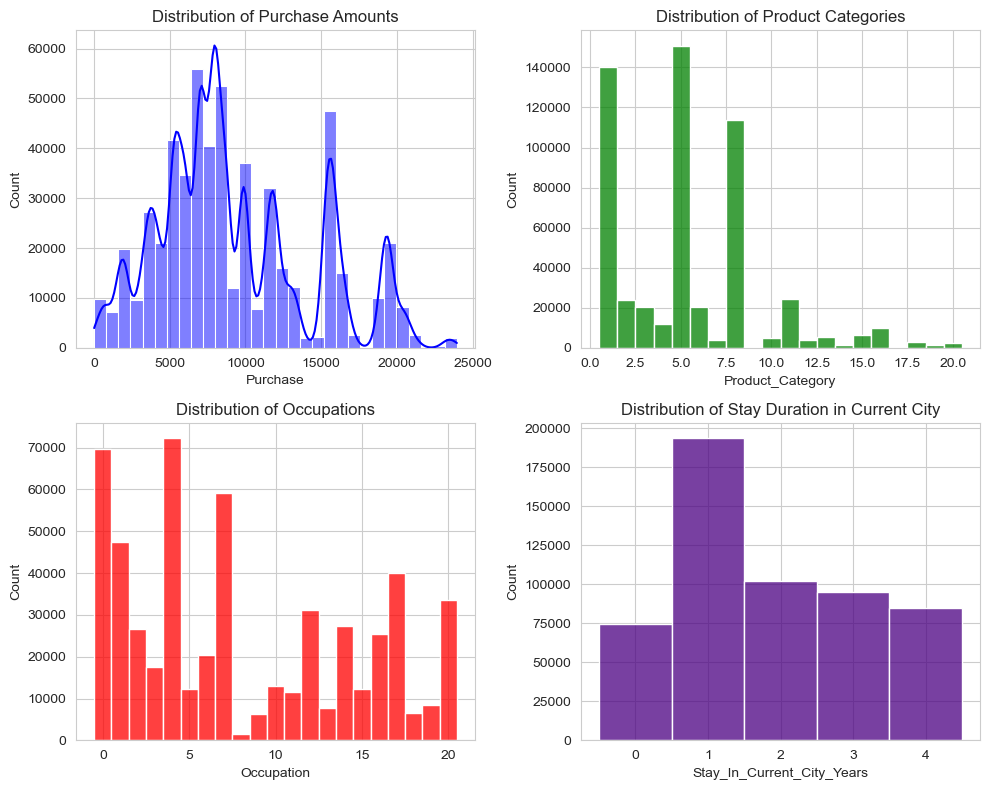

In [76]:
# Set up a 2x2 grid of subplots
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Distribution plot for 'Purchase' values (Continuous Variable)
sns.histplot(data['Purchase'], kde=True, bins=30, ax=axis[0, 0], color="blue")
axis[0, 0].set_title("Distribution of Purchase Amounts")

# Distribution plot for 'Product_Category' (Discrete Variable)
sns.histplot(data['Product_Category'], discrete=True, bins=21, ax=axis[0, 1], color="green")
axis[0, 1].set_title("Distribution of Product Categories")

# Distribution plot for 'Occupation' (Discrete Variable)
sns.histplot(data['Occupation'], discrete=True, bins=25, ax=axis[1, 0], color="red")
axis[1, 0].set_title("Distribution of Occupations")

# Distribution plot for 'Stay_In_Current_City_Years' (Discrete Variable)
sns.histplot(data['Stay_In_Current_City_Years'],discrete=True, bins=4, ax=axis[1, 1], color="indigo")
axis[1, 1].set_title("Distribution of Stay Duration in Current City")

# Adjust layout
plt.tight_layout()
plt.show()

### Key Insights from the Distribution Graphs
1. **Purchase Amount Distribution (Top Left):**
- The purchase distribution is right-skewed, meaning most purchases are on the lower end, with a few high-value purchases.
- There are several peaks, indicating that purchases commonly occur at certain price points (e.g., near 5,000, 10,000, and 15,000).
- Outliers exist in the higher range (above 20,000), suggesting some customers make significantly expensive purchases.
- This could indicate a mixed customer base where some buyers purchase low-cost items frequently, while others invest in high-value products.
2. **Product Category Distribution (Top Right):**
- Categories 1, 5, and 8 are the most frequently purchased.
- A steep drop in purchase counts is observed after Category 8, indicating that many categories are not as popular.
- Some categories (e.g., 9, 12, 19, 20) have very few purchases, suggesting they are either niche or underperforming products.
- Business Strategy Insight: 
    - Products in categories 1, 5, and 8 could be key revenue drivers, and low-performing categories should be reviewed for improvement or discontinuation. (Maybe conduct Market Basket Analysis if they trigger the sales of other products/product categories
3. **Occupation Distribution (Bottom Left):**
- Certain occupations (0, 4, 7, 17, 20) have significantly more buyers.
- Some occupations have very low representation, indicating that specific job types are more engaged in Black Friday shopping.
- This could suggest targeted marketing strategies toward high-spending occupations.
4. **Stay Duration in Current City Distribution (Bottom Right):**
- Most buyers have lived in their city for 1 year, followed by 2-4 years.
- A relatively lower number of buyers have stayed for 0 years (new movers).
- Long-term residents (4+ years) make up a smaller but still significant proportion of buyers.
- Business Strategy Insight:
    - Customers who have lived in the city for 1 year are the most engaged buyers, possibly because they are settling in and shopping more.
    - A targeted campaign for newer movers (0 years) could be an opportunity to increase customer engagement.

#### Actionable Recommendations
- Focus promotions on product categories 1, 5, and 8, as they drive the highest sales.
- Analyze why certain product categories (e.g., 9, 12, 19, 20) are underperforming and consider improving them.
- Segment marketing efforts based on high-buying occupations to maximize conversion rates.
- Consider special promotions for newer city residents (0-1 years) to increase brand engagement.
 

### Checking Normality in Our Data

The mu (mean) is 9263 and sigma (standard deviation) is 5023 for the curve


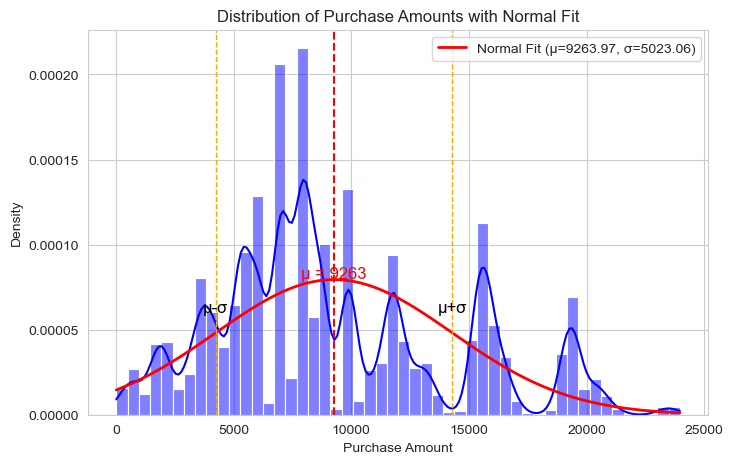

In [77]:
from scipy.stats import norm

# Plot distribution of 'Purchase' values with a normal curve fit
plt.figure(figsize=(8,5))
sns.histplot(data['Purchase'], kde=True, bins=50, color="blue", stat="density")

# Fit a normal curve
mu, sigma = norm.fit(data['Purchase'])
print("The mu (mean) is {} and sigma (standard deviation) is {} for the curve".format(int(mu), int(sigma)))

# Generate x values for the normal curve
x = np.linspace(min(data['Purchase']), max(data['Purchase']), 100)
plt.plot(x, norm.pdf(x, mu, sigma), color='red', lw=2, label=f'Normal Fit (μ={mu:.2f}, σ={sigma:.2f})')

# Mark mean (μ) with a vertical red dashed line
plt.axvline(mu, color='red', linestyle='dashed', linewidth=1.5)
plt.text(mu, 0.00008, f"μ = {int(mu)}", color="red", fontsize=12, ha='center')

# Mark one standard deviation from the mean (σ)
plt.axvline(mu - sigma, color='orange', linestyle='dashed', linewidth=1.0)
plt.axvline(mu + sigma, color='orange', linestyle='dashed', linewidth=1.0)

plt.text(mu - sigma, 0.00006, f"μ-σ", color="black", fontsize=12, ha='center')
plt.text(mu + sigma, 0.00006, f"μ+σ", color="black", fontsize=12, ha='center')

# Graph Labels
plt.title("Distribution of Purchase Amounts with Normal Fit")
plt.xlabel("Purchase Amount")
plt.ylabel("Density")
plt.legend()
plt.show()

**Key Insights from the Normal Distribution Analysis:**

The purchase distribution is right-skewed, indicating that most purchases fall within the lower to mid-range, while a smaller group of high-value spenders pulls the average higher. The mean purchase amount is 9,263, but the median (8,047) is a better measure of central tendency due to the skewness.

- Purchase Variability: With a standard deviation of 5,023 dollars, spending varies significantly among customers, with some making small purchases and others exceeding 20,000 dollars.
- Presence of Outliers: High-value purchases above 20,000 dollars indicate a premium customer segment contributing significantly to total revenue.
- Impact on Predictive Models: The skewed distribution suggests that relying solely on the mean can bias machine learning models. Applying log transformation or median-based analysis can improve prediction accuracy.

Customer Segmentation:
- Mid-range spenders dominate the market, while a smaller segment drives high-value transactions.
- Premium buyers should be identified and targeted for retention.
- Budget-conscious shoppers may require different pricing and marketing strategies.

#### Business Recommendations
- Implement a tiered pricing strategy to increase spending from mid-range customers.
- Introduce high-value exclusive offers to retain and further engage premium customers.
- Use log transformation for predictive modeling to reduce skewness bias.
- Design separate marketing campaigns for budget shoppers vs. high spenders.

### Checking if the analysis on each customer's overall contribution rather than every individual transaction makes more sense

Mean Purchase per User: 865016.5917501273
Standard Deviation per User: 943644.5396828403


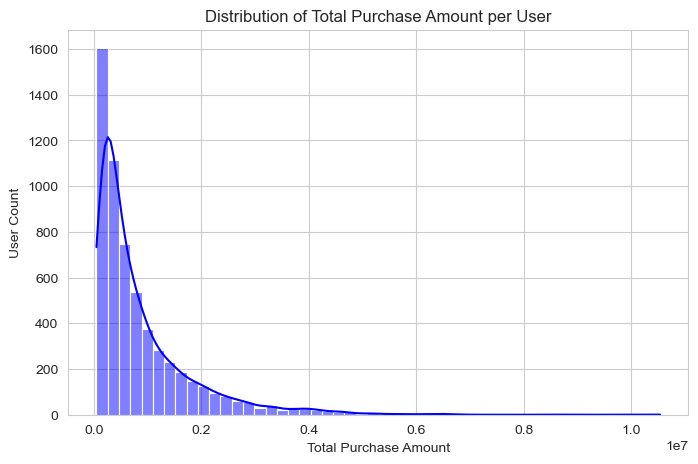

In [78]:
# Group by User_ID and sum up total purchases per customer
user_spending = data.groupby("User_ID")["Purchase"].sum().reset_index()

# Check new distribution statistics
print("Mean Purchase per User:", user_spending["Purchase"].mean())
print("Standard Deviation per User:", user_spending["Purchase"].std())

# Visualizing the user-level distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(user_spending["Purchase"], kde=True, bins=50, color="blue")
plt.title("Distribution of Total Purchase Amount per User")
plt.xlabel("Total Purchase Amount")
plt.ylabel("User Count")
plt.show()

The histogram shows a highly right-skewed distribution where:

- Most users have low total purchases (high bar on the left).
- A few users have extremely high total purchases (long tail on the right).
- The mean (865,016) is much higher than most users actually spend, due to a few very high spenders (which a significant contributors too)


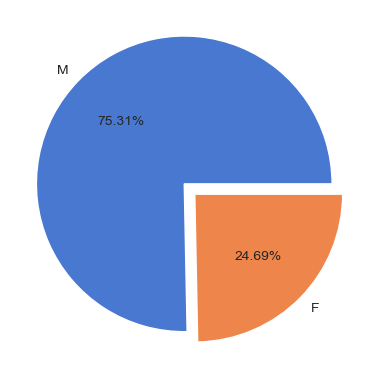

In [79]:
plt.pie(data['Gender'].value_counts(),labels = data['Gender'].value_counts().index,autopct = '%0.2f%%',explode = (0.1,0.0))
plt.show()

/var/folders/_h/68yv6pbs5wqc6xr4qd592nf80000gp/T/ipykernel_10964/493280924.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


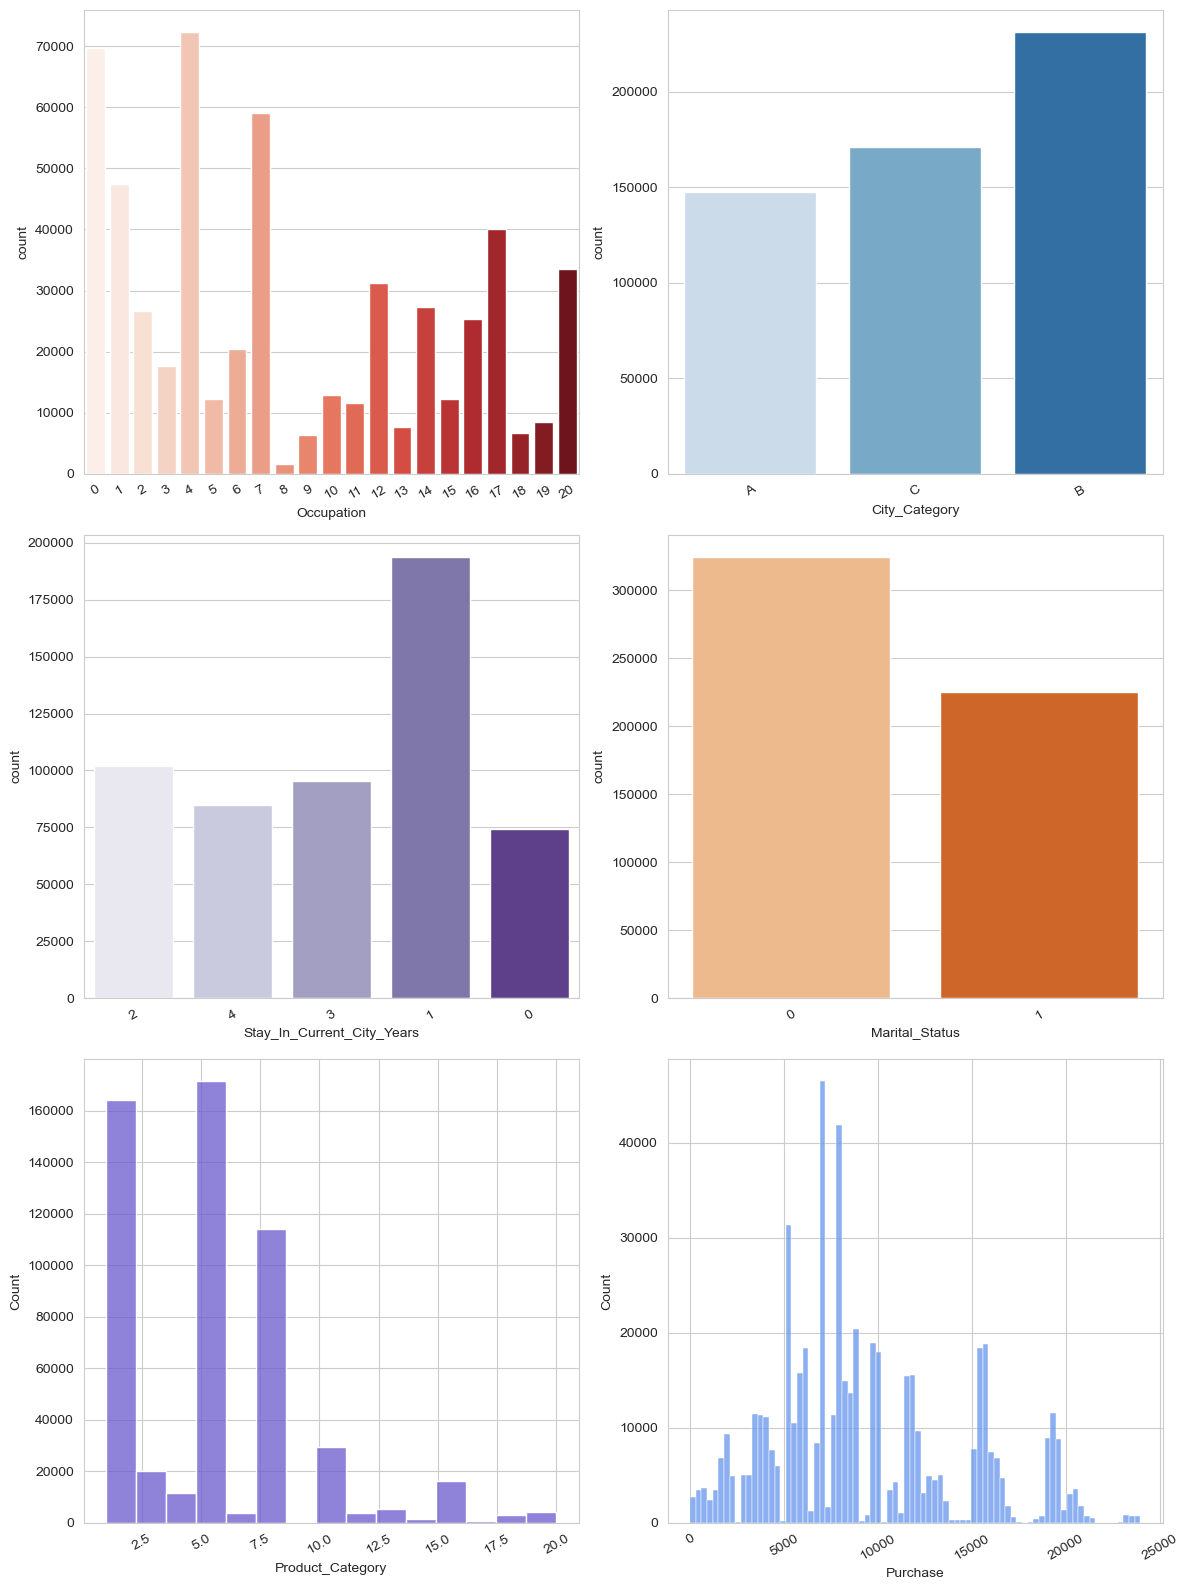

In [80]:
# Create a copy of the dataset to avoid modifying the original
df = data.copy()

# Convert categorical variables to string in the copied dataset
df["Marital_Status"] = df["Marital_Status"].astype(str)
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype(str)

# Set figure size
fig, axes = plt.subplots(3, 2, figsize=(12, 16))

# Use countplot for categorical variables
sns.countplot(x="Occupation", data=df, ax=axes[0, 0], palette="Reds")
sns.countplot(x="City_Category", data=df, ax=axes[0, 1], palette="Blues")
sns.countplot(x="Stay_In_Current_City_Years", data=df, ax=axes[1, 0], palette="Purples")
sns.countplot(x="Marital_Status", data=df, ax=axes[1, 1], palette="Oranges")

# Use histplot with better bins
sns.histplot(df["Product_Category"], bins=15, ax=axes[2, 0], color="slateblue")
sns.histplot(df["Purchase"], bins=80, ax=axes[2, 1], color="cornflowerblue")

# Rotate labels for better readability
for ax in axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.tight_layout()
plt.show()


1. **Gender Distribution:**
- The majority of buyers are male, while females are in the minority.
- This difference might be influenced by the product categories available during Black Friday sales.

2. **Age Categories:** 
- Buyers are classified into 7 different age groups, providing a structured view of purchasing trends across age ranges.(26-30 being the highest) 


3. **Marital Status:**
- The majority of buyers are single, indicating that unmarried individuals may be more active shoppers during Black Friday.

4. **Occupation Distribution:**
- Buyers come from various occupations, but Occupation 8 has an extremely low count compared to others.
- Since it has minimal representation, it can be ignored in calculations without significantly impacting results.

5. **Product Category Trends:**
- Most purchases belong to categories 1, 5, and 8, showing that these product groups dominate sales.
- Less frequent categories can be combined into a single group to simplify analysis.

6. **City-Wise Distribution:**
- Cities with a higher buyer count likely represent urban areas with larger populations.

7. **Stay Duration in City:**
- Most buyers have lived in their city for just one year.
- Other categories have a more uniform distribution across different stay durations.

### Comparing "Purchase" across other features

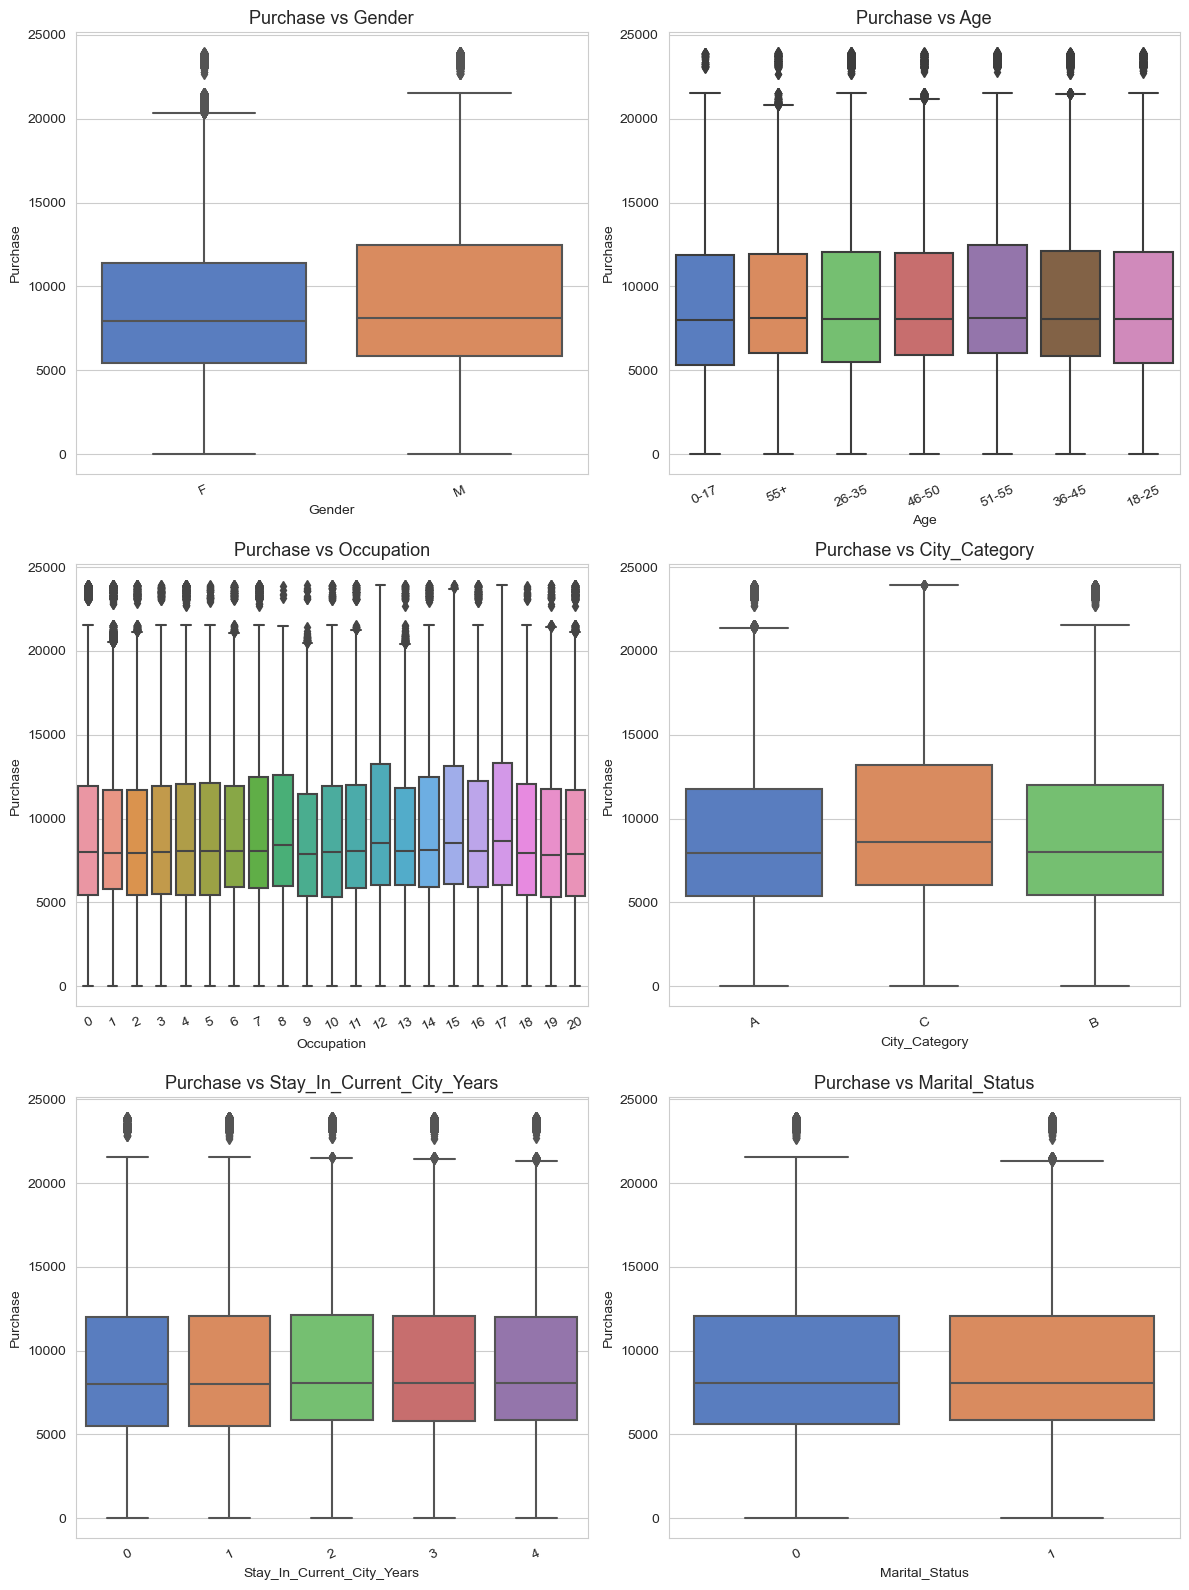

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define features to compare with 'Purchase'
features = ['Gender', 'Age', 'Occupation', 'City_Category', 
            'Stay_In_Current_City_Years', 'Marital_Status']

# Set a simple style and color theme
sns.set_style("whitegrid")
sns.set_palette("muted")  # A clear, professional color palette

# Create subplots with 4 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 16))

# Flatten the 2D axes array into 1D for easy iteration
axes = axes.flatten()

# Generate boxplots for each feature
for i, feature in enumerate(features):
    sns.boxplot(data=data, x=feature, y='Purchase', ax=axes[i])
    axes[i].set_title(f"Purchase vs {feature}", fontsize=13)
    axes[i].tick_params(axis='x', rotation=25)  # Rotate x labels for readability

# Adjust layout
plt.tight_layout()
plt.show()


- The median purchase for males is slightly higher than for females.
- However, the overall spread and distribution are similar, suggesting that both genders make purchases across a wide range of values.


- All age groups show similar median purchase values with a large spread.
- There are high-value purchases in every age group, but no particular age group spends significantly more than others.


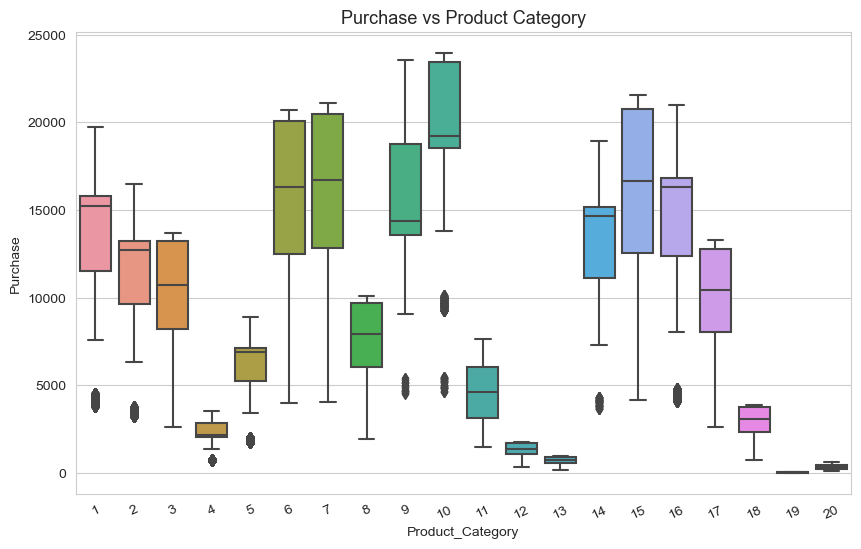

In [82]:
plt.figure(figsize=(10, 6))  # Adjusted figure size
sns.boxplot(data=data, x='Product_Category', y='Purchase')

plt.title("Purchase vs Product Category", fontsize=13)
plt.xticks(rotation=25)  # Slightly rotate labels for better readability

plt.show()

**Some Product Categories Have High Spending with Large Variability**
- Categories like 5, 8, 10, 15, and 16 have higher median purchase values, indicating that these products are generally **more expensive**
- These categories also have wider interquartile ranges (IQRs), showing high variation in spending across different buyers.
- Category 10 has one of the highest purchases, suggesting it might include premium or high-end products.


**Low purchase products**
- Categories 4, 11, 12, 13, 19, and 20 have very low median purchases.
- The box is narrow, meaning purchases are low and consistent.
- Some categories like 12 and 19 barely show any spending, meaning they are either less popular or contain low-cost items.

**High-Value Outliers in Some Categories**
- Several categories (6, 9, 10, 15, 16) show extreme outliers, meaning some customers made very high-value purchases in these product groups.
- These high-spending customers may represent a premium buyer segment.

# DATA ANALYSIS

## 1. Checking User Purchase Behavior

### 1.1 Number of Products Purchased by Each User

In [83]:
# Group by User_ID and Gender, then count Product_IDs
user_prod_counts = data.groupby(["User_ID","Gender"])["Product_ID"].count().reset_index(name="Product_Counts")

# Sort by most purchases
user_prod_counts.sort_values(["Product_Counts"], ascending=False, inplace=True)

user_prod_counts.head()

,User_ID,Gender,Product_Counts
1634,1001680,M,1026
4166,1004277,M,979
1885,1001941,M,898
1142,1001181,M,862
863,1000889,M,823


- Some users purchase significantly more products than others, suggesting power shoppers vs. casual buyers.
- This can help in segmenting frequent buyers for loyalty programs.

### 1.2 Aggregating User Purchases for Further Analysis

In [84]:
# Combining multiple occurances of a single user to use in further analysis
per_user_purchase = data.groupby(['User_ID','Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status'])[['Purchase']].sum().reset_index()
per_user_purchase

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1000001,F,0-17,10,A,2,0,334093
1,1000002,M,55+,16,C,4,0,810472
2,1000003,M,26-35,15,A,3,0,341635
3,1000004,M,46-50,7,B,2,1,206468
4,1000005,M,26-35,20,A,1,1,821001
...,...,...,...,...,...,...,...,...
5886,1006036,F,26-35,15,B,4,1,4116058
5887,1006037,F,46-50,1,C,4,0,1119538
5888,1006038,F,55+,1,C,2,0,90034
5889,1006039,F,46-50,0,B,4,1,590319


- Instead of analyzing transactions separately, we now see each user’s total spending.
- Helps in better user segmentation and high-value customer targeting.

## 2. Gender-Based Purchase Analysis


### 2.1 Finding Top Male & Female Customers

In [85]:
# Split data by Gender
male_prod_count = user_prod_counts[user_prod_counts["Gender"] == "M"]
female_prod_count = user_prod_counts[user_prod_counts["Gender"] == "F"]

# Find the Male & Female customer with the highest purchases
max_male_user = male_prod_count.loc[male_prod_count["Product_Counts"].idxmax(), "User_ID"]
max_female_user = female_prod_count.loc[female_prod_count["Product_Counts"].idxmax(), "User_ID"]

# Get details of these top customers
max_male_user_info = data[data["User_ID"] == max_male_user]
max_female_user_info = data[data["User_ID"] == max_female_user]

In [86]:
max_male_user

1001680

In [87]:
max_female_user

1001150

**Male Top Shopper: Purchased 1026 products**: Married, Age 26-35, City A, Stayed for 3 years

**Female Top Shopper: Purchased 752 products**:Unmarried, Age 26-35, City A, Stayed for 1 year

### 2.2 Comparing Male vs. Female Spending Behavior

In [88]:
# Gender wise value counts in avg_amt_df
per_user_purchase['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

In [89]:
# Calculate average and total purchase per gender
avg_purchase_by_gender = per_user_purchase.groupby(["Gender"])["Purchase"].mean().reset_index(name="avg_purchase")
total_purchase_by_gender = data.groupby("Gender")["Purchase"].sum().reset_index(name="total_purchase")

In [90]:
avg_purchase_by_gender

,Gender,avg_purchase
0,F,712024.394958
1,M,925344.402367


In [91]:
total_purchase_by_gender

,Gender,total_purchase
0,F,1186232642
1,M,3909580100


**Visualization: Total vs. Average Spending by Gender**

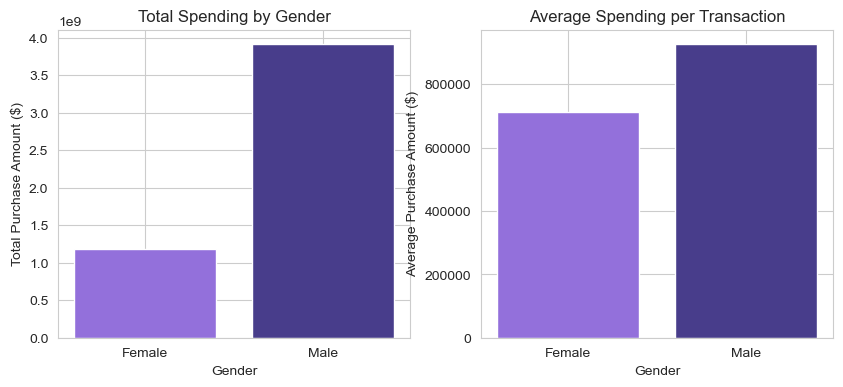

In [92]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.bar(["Female", "Male"], total_purchase_by_gender["total_purchase"], color=["mediumpurple","darkslateblue"])
plt.xlabel("Gender")
plt.ylabel("Total Purchase Amount ($)")
plt.title("Total Spending by Gender")

plt.subplot(1,2,2)
plt.bar(["Female", "Male"], avg_purchase_by_gender["avg_purchase"], color=["mediumpurple","darkslateblue"])
plt.xlabel("Gender")
plt.ylabel("Average Purchase Amount ($)")
plt.title("Average Spending per Transaction")

plt.show()

Males Contribute to a Much Higher Total Purchase Amount (~4B vs. ~1.2B for Females)

1. Men spend over 3x more than women in total Black Friday purchases, indicating they are the dominant segment in overall sales volume.
- **Insight:** This suggests that marketing efforts targeting male consumers could yield higher total revenue.

2. Males Also Spend More Per Transaction (~900K vs. ~700K for Females)
- While males dominate in total spending, they also have a higher average purchase per transaction, indicating they buy higher-value items or make bulk purchases.
- **Business Action:** Promote high-ticket items, tech products, and premium offerings towards male shoppers. (can drive more insights from product category names instead of masked values)

3. Females Have Significant Spending Power Despite Lower Total Volume
- Even though women spend less in total, their average transaction value is still substantial (~700K).
- **Business Action:** Increasing female engagement through targeted promotions, personalized offers, and product recommendations could help narrow the spending gap and drive more sales from female customers.



### 2.2 Analyzing Product Category Preferences by Gender

In [93]:
# Group by Product Category and Gender, then calculate the average purchase amount
avg_purchase_by_category_gender = data.groupby(["Product_Category", "Gender"])["Purchase"].mean().reset_index()

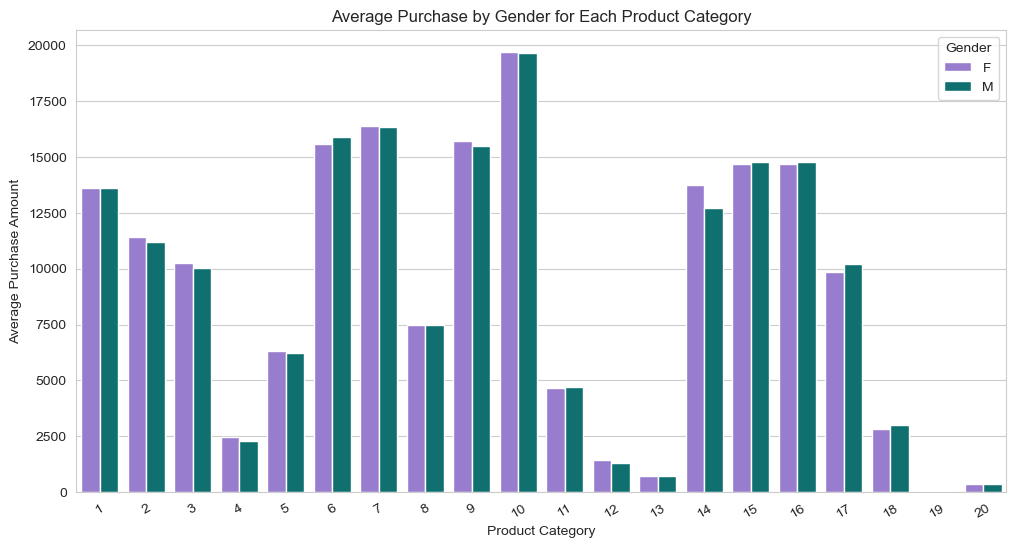

In [94]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Product_Category", y="Purchase", hue="Gender", data=avg_purchase_by_category_gender, palette=["mediumpurple", "teal"])
plt.title("Average Purchase by Gender for Each Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Purchase Amount")
plt.legend(title="Gender")
plt.xticks(rotation=30)  # Rotate x-axis labels for better visibility
plt.show()


Men and Women Have Similar Spending Patterns Across Most Categories

- In most product categories, both genders spend nearly the same on average.
- This suggests that pricing strategies and promotions should not be heavily gender-specific for many product categories.

## 3. Marital Status & Spending Behavior

### 3.1 Comparing Spending Between Married vs. Unmarried Customers

In [95]:
per_user_purchase['Marital_Status'].value_counts()

0    3417
1    2474
Name: Marital_Status, dtype: int64

In [96]:
# Analyze spending based on marital status (for both genders)
marital_spending = per_user_purchase.groupby("Marital_Status")["Purchase"].agg(["sum", "mean"]).reset_index()
marital_spending.columns = ["Marital_Status", "Total_Spending", "Avg_Spending"]
print(marital_spending)

   Marital_Status  Total_Spending   Avg_Spending
0               0      3008927447  880575.781972
1               1      2086885295  843526.796686


**Visualization: Spending Differences by Marital status**

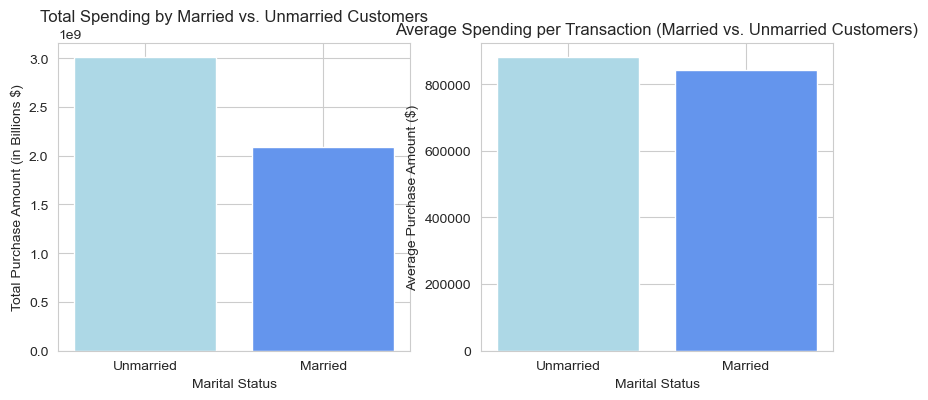

In [97]:
plt.figure(figsize=(10, 4))
labels = ["Unmarried","Married"]
# Total Spending Bar Chart
plt.subplot(1, 2, 1)
plt.bar(labels, marital_spending["Total_Spending"], color=["lightblue", "cornflowerblue"])
plt.title("Total Spending by Married vs. Unmarried Customers")
plt.xlabel("Marital Status")  # Updated label
plt.ylabel("Total Purchase Amount (in Billions $)")  # Updated unit

# Average Spending per Transaction Bar Chart
plt.subplot(1, 2, 2)
plt.bar(labels, marital_spending["Avg_Spending"], color=["lightblue", "cornflowerblue"])
plt.title("Average Spending per Transaction (Married vs. Unmarried Customers)")
plt.xlabel("Marital Status")  # Updated label
plt.ylabel("Average Purchase Amount ($)")  # Updated unit

plt.show()


**Strategic Business Takeaways from Married vs. Unmarried Spending:**
1. Unmarried Customers Have Higher Total Spending (~ 3 Billion vs 2 Billion), Indicating More Frequent Shopping Behavior
- This suggests higher engagement with Black Friday sales, possibly due to more disposable income and impulse buying behavior.
- **Business Action:** 
    - Offer flash sales, exclusive online deals, or limited-time discounts targeted at unmarried shoppers to leverage their frequent purchasing behavior.

2. Average Spending Per Transaction is Similar (~$850K for Both Groups), Suggesting No Major Differences in Purchase Size

- Since both groups spend similar amounts per transaction, the difference in total spending is likely due to purchase frequency rather than high-value purchases.
- **Business Action:** 
    - Encourage married customers to shop more frequently by offering personalized product bundles or subscription-based offers (e.g., family bundles, long-term discounts).

3. Married Shoppers May Be More Budget-Conscious or Selective in Purchases
- Their lower total spending might indicate prioritized spending habits and a focus on essential purchases over impulse buys.
- **Business Action:** 
    - Provide installment payment options or cashback rewards for higher-ticket items to increase spending from married customers.


## 4. Age-Based Spending Analysis

### 4.1 Analyzing Total vs. Average Spending by Age Group

In [98]:
per_user_purchase['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [99]:
average_purchase_gender_age = per_user_purchase.groupby(["Gender","Age"])["Purchase"].mean().reset_index(name="avg_price")
average_purchase_gender_age

,Gender,Age,avg_price
0,F,0-17,5.434100e+05
1,F,18-25,7.159437e+05
2,F,26-35,8.128004e+05
3,F,36-45,7.310479e+05
4,F,46-50,6.412465e+05
5,F,51-55,6.300422e+05
6,F,55+,4.624522e+05
7,M,0-17,6.609086e+05
8,M,18-25,9.058476e+05
9,M,26-35,1.053577e+06


In [100]:
tot_age_grouped_purchases = per_user_purchase.groupby("Age")["Purchase"].sum()
tot_age_grouped_purchases

Age
0-17      134913183
18-25     913848675
26-35    2031770578
36-45    1026569884
46-50     420843403
51-55     367099644
55+       200767375
Name: Purchase, dtype: int64

In [101]:
avg_age_grouped_purchases = per_user_purchase.groupby("Age")["Purchase"].mean()
avg_age_grouped_purchases

Age
0-17     618867.811927
18-25    854863.119738
26-35    989659.317097
36-45    879665.710368
46-50    792548.781544
51-55    763200.923077
55+      539697.244624
Name: Purchase, dtype: float64

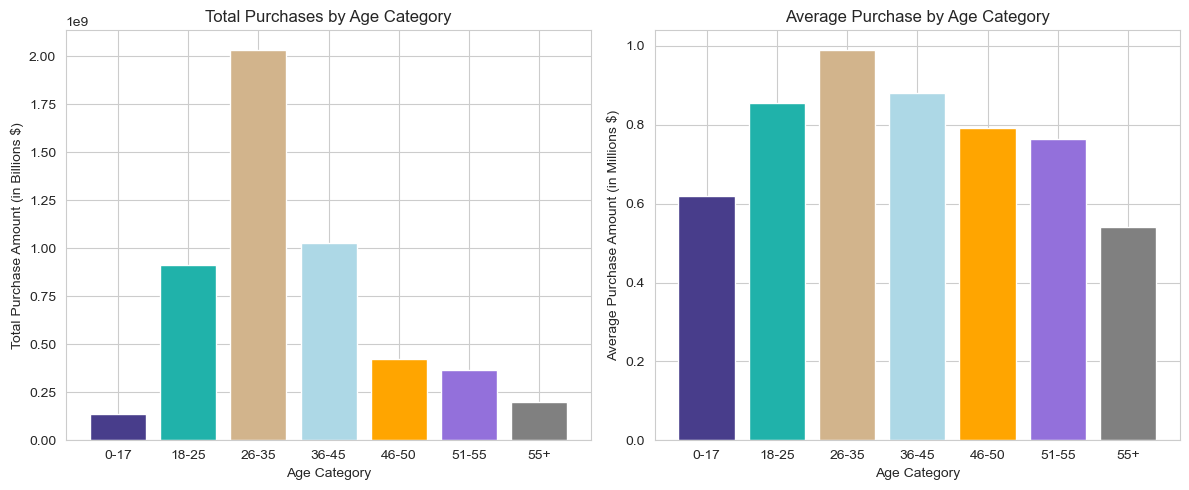

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Total Purchases Bar Chart
axes[0].bar(tot_age_grouped_purchases.index, tot_age_grouped_purchases, color=['darkslateblue', 'lightseagreen', 'tan', 'lightblue', 'orange', 'mediumpurple', 'grey'])
axes[0].set_title("Total Purchases by Age Category")
axes[0].set_xlabel("Age Category")  # X-axis label
axes[0].set_ylabel("Total Purchase Amount (in Billions $)")  # Y-axis label

# Average Purchases Bar Chart
axes[1].bar(avg_age_grouped_purchases.index, avg_age_grouped_purchases / 1e6, 
            color=['darkslateblue', 'lightseagreen', 'tan', 'lightblue', 'orange', 'mediumpurple', 'grey'])
axes[1].set_title("Average Purchase by Age Category")
axes[1].set_xlabel("Age Category")  # X-axis label
axes[1].set_ylabel("Average Purchase Amount (in Millions $)")  # Y-axis label


# Show the plots
plt.tight_layout()
plt.show()

- 26-35 Age Group is the Highest Spender (~2.03 Billion) → Likely young professionals with disposable income.
- 36-45 Age Group follows (~1.02 Billion) → Possibly family-oriented buyers with stable incomes.
- Lowest Spending: 0-17 & 55+ Age Groups → Teenagers rely on parents; older individuals may prefer offline shopping

The 55+ category has the lowest total purchase volume, but their average spending per transaction remains relatively high, similar to the 46-55 age group.
This means older customers are making fewer purchases but are willing to spend well when they do shop.
We should not ignore this segment as we may miss out on a valuable customer base. Offering trust-based marketing (such as emphasizing reliability and quality) can help capture this audience.

**Rather than only focusing on the top-spending age group, we should adopt a diverse marketing strategy that caters to all age segments.**

## 5. City Based Spending Analysis

In [103]:
tot_city_grouped_purchases = per_user_purchase.groupby("City_Category")["Purchase"].sum()
tot_city_grouped_purchases

City_Category
A    1316471661
B    2115533605
C    1663807476
Name: Purchase, dtype: int64

In [104]:
avg_city_grouped_purchases = per_user_purchase.groupby("City_Category")["Purchase"].mean()
avg_city_grouped_purchases

City_Category
A    1.259781e+06
B    1.239328e+06
C    5.300438e+05
Name: Purchase, dtype: float64

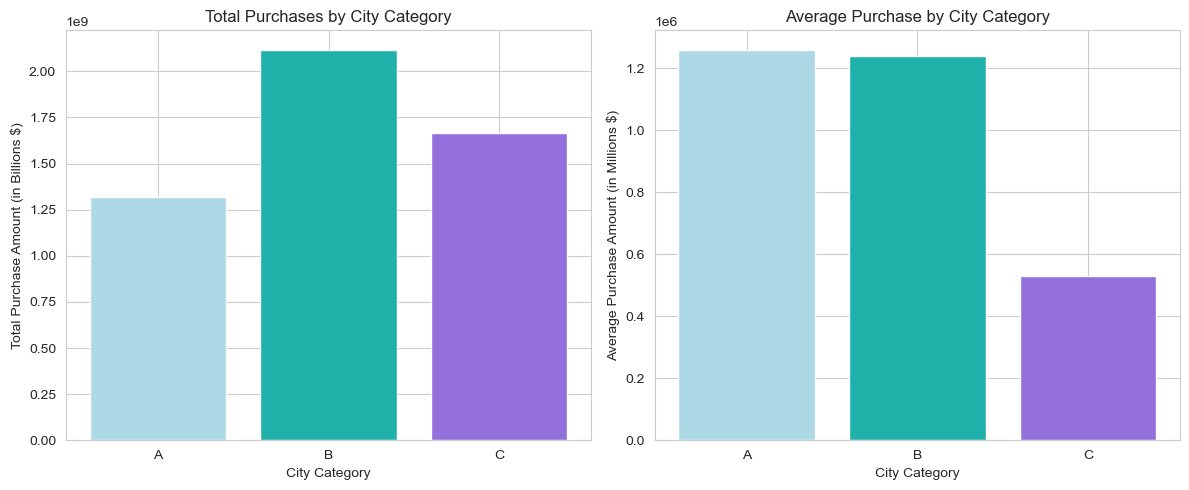

In [105]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot for Total Purchases
axes[0].bar(tot_city_grouped_purchases.index, tot_city_grouped_purchases, color=['lightblue', 'lightseagreen', 'mediumpurple'])
axes[0].set_title("Total Purchases by City Category")
axes[0].set_xlabel("City Category")
axes[0].set_ylabel("Total Purchase Amount (in Billions $)")

# Bar plot for Average Purchases
axes[1].bar(avg_city_grouped_purchases.index, avg_city_grouped_purchases, color=['lightblue', 'lightseagreen', 'mediumpurple'])
axes[1].set_title("Average Purchase by City Category")
axes[1].set_xlabel("City Category")
axes[1].set_ylabel("Average Purchase Amount (in Millions $)")

# Show the plots
plt.tight_layout()
plt.show()

1. City B contributes the highest total sales (2.1B), followed by City C (1.6B) and City A (~1.3B).

- This indicates that City B has the largest customer base or a higher transaction volume.
- Mass-market promotions and discounts should be focused on City B to maximize total revenue.

2. Despite lower total purchases, City A along with B has the highest average purchase per transaction (1.2M), whereas City C has the lowest (970K).
- This suggests that customers in City A & B spend more per transaction, possibly preferring premium products or bulk purchases.
- Introduce exclusive, high-value product bundles or loyalty perks for City A & B customers to sustain their high spending behavior.

3. City C has strong total sales but a lower average transaction value, suggesting a higher number of smaller purchases. It's average purchase is about half of City A & B, suggesting either a lower spending capability or differences in product availability or consumer behavior.

- Boost engagement in City C: 
    - City C shows a notably lower average purchase amount, meaning customers here may prioritize affordability over premium products.
    - Focus on budget-friendly deals, EMI options, or "buy more, save more" discounts to increase transaction value.

# Summary and Key Takeaways:
## 1. Gender-Based Purchase Behavior
- Males contributed over 3x more to total revenue (3.9B) compared to females (1.2B).
- Males also had a higher average purchase per transaction (900K) compared to females (700K).
- Spending patterns across product categories were similar for both genders, with some variations in high-value categories.

## 2. Age-Based Spending Analysis
- The 26-35 age group spent the most (2.03B), followed by 36-45 (1.02B).
- Despite lower total spending, the 55+ age group had a relatively high average transaction value (~540K).
- The youngest (0-17) and oldest (55+) groups made the fewest total purchases, but their spending per transaction was still significant.
- Spending declines after 45, suggesting different shopping priorities among older consumers

## 3. Marital Status & Spending Patterns
- Unmarried customers spent significantly more in total (3B) compared to married customers (2B).
- Both groups had a similar average spending per transaction (~850K), suggesting that purchase frequency, rather than purchase size, contributed to the total spending gap.
- Married customers likely exhibit more selective spending habits compared to unmarried customers.

## 4. City-Based Purchase Behavior
- City B had the highest total purchases (2.1B), followed by City C (1.6B) and City A (~1.3B).
- Despite lower total spending, City A and City B had the highest average transaction values (1.2M each), while City C had the lowest (970K).
- City C exhibited a higher number of smaller purchases, possibly indicating different spending behaviors or product availability preferences.

## 5. Final Takeaways:
- Male consumers and the 26-35 age group were the dominant contributors to Black Friday sales.
- Unmarried individuals and consumers in City B had the highest total spending.
- The 55+ age group and City C, despite lower total sales, showed notable average purchase values, indicating they should not be overlooked.
- Total vs. average spending differences across segments highlight opportunities for targeted strategies across different consumer groups.